In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from statsmodels.tools.eval_measures import rmse 
from datetime import datetime as dt

In [2]:
df=pd.read_csv('../Data/Kaggle traffic.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [4]:
df.isnull().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

In [5]:
df.columns

Index(['DateTime', 'Junction', 'Vehicles', 'ID'], dtype='object')

In [6]:
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [7]:
df['DateTime']=pd.to_datetime(df['DateTime']) # to_datetime이후에 할당을 해주지 않으면 반영이 안됨/ inplace가 없음

In [8]:
for num,i in enumerate(df['DateTime']):
    new_date=i.replace(hour=0)
   #new_date = dt.strptime(i,'%Y-%m-%d ')
    df['DateTime'][num] = new_date   

df['DateTime']

C:\Users\dsd09\AppData\Local\Temp\ipykernel_10436\2777894337.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DateTime'][num] = new_date


0       2015-11-01
1       2015-11-01
2       2015-11-01
3       2015-11-01
4       2015-11-01
           ...    
48115   2017-06-30
48116   2017-06-30
48117   2017-06-30
48118   2017-06-30
48119   2017-06-30
Name: DateTime, Length: 48120, dtype: datetime64[ns]

In [9]:
df=df.drop(labels=['Junction','ID'],axis=1)
df

,DateTime,Vehicles
0,2015-11-01,15
1,2015-11-01,13
2,2015-11-01,10
3,2015-11-01,7
4,2015-11-01,9
...,...,...
48115,2017-06-30,11
48116,2017-06-30,30
48117,2017-06-30,16
48118,2017-06-30,22


In [10]:
df=df.groupby(by='DateTime').mean() #시간별로의 데이터의 평균을 냈음
df

,Vehicles
DateTime,
2015-11-01,8.277778
2015-11-02,12.625000
2015-11-03,12.652778
2015-11-04,11.361111
2015-11-05,10.694444
...,...
2017-06-26,30.791667
2017-06-27,38.635417
2017-06-28,37.281250


In [11]:
len(df)

608

In [12]:
df['DateTime'] = df.index
df.index = range(len(df))

In [13]:
df

,Vehicles,DateTime
0,8.277778,2015-11-01
1,12.625000,2015-11-02
2,12.652778,2015-11-03
3,11.361111,2015-11-04
4,10.694444,2015-11-05
...,...,...
603,30.791667,2017-06-26
604,38.635417,2017-06-27
605,37.281250,2017-06-28
606,37.239583,2017-06-29


In [14]:
df.columns=['y','ds']
df.columns

Index(['y', 'ds'], dtype='object')

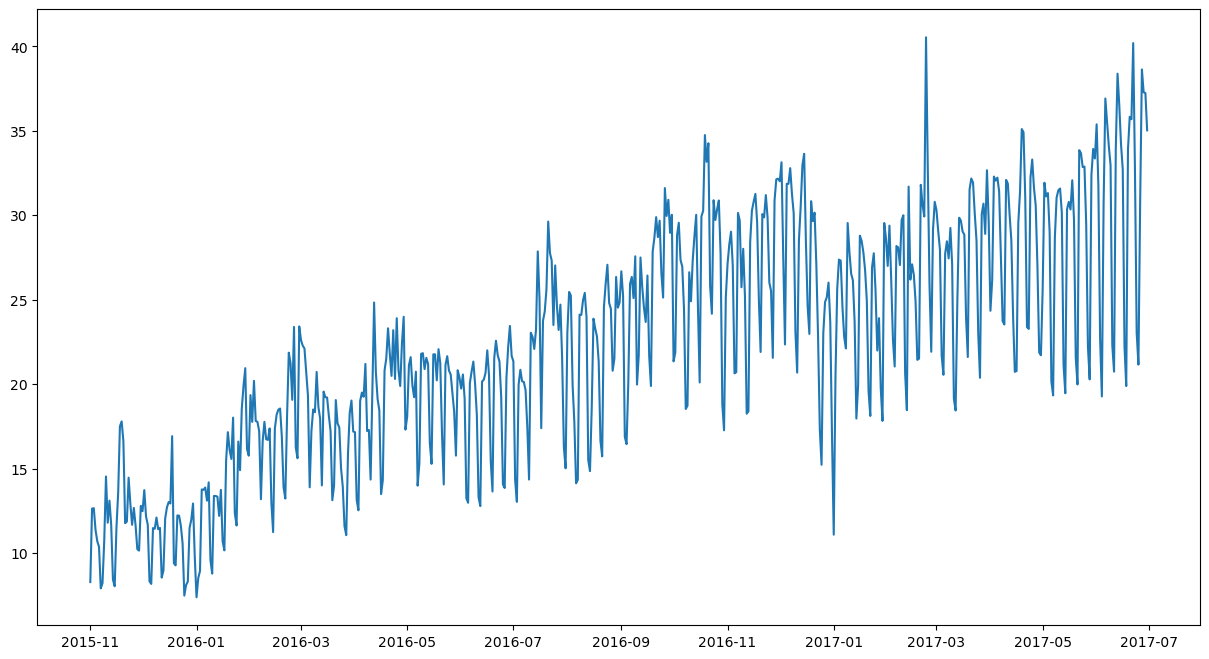

In [15]:
ax=plt.figure(figsize=(15,8))
plt.plot(df['ds'],df['y'])

In [16]:
train = df[:-30]
test = df[-30:]
m = Prophet(interval_width=0.8).fit(train)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\dsd09\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\dsd09\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\dsd09\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-11-01,10.688324,2.250026,9.192426,10.688324,10.688324,-5.114899,-5.114899,-5.114899,-5.114899,-5.114899,-5.114899,0.0,0.0,0.0,5.573425
1,2015-11-02,10.735941,8.791475,15.713656,10.735941,10.735941,1.660903,1.660903,1.660903,1.660903,1.660903,1.660903,0.0,0.0,0.0,12.396844
2,2015-11-03,10.783558,9.355183,16.424712,10.783558,10.783558,2.241369,2.241369,2.241369,2.241369,2.241369,2.241369,0.0,0.0,0.0,13.024928
3,2015-11-04,10.831176,9.431434,16.584253,10.831176,10.831176,2.171115,2.171115,2.171115,2.171115,2.171115,2.171115,0.0,0.0,0.0,13.002291
4,2015-11-05,10.878793,9.352537,16.488172,10.878793,10.878793,2.022850,2.022850,2.022850,2.022850,2.022850,2.022850,0.0,0.0,0.0,12.901643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,2017-06-26,28.611816,26.801694,33.744367,28.584813,28.639784,1.660903,1.660903,1.660903,1.660903,1.660903,1.660903,0.0,0.0,0.0,30.272719
604,2017-06-27,28.623059,27.480736,34.163834,28.593704,28.652735,2.241369,2.241369,2.241369,2.241369,2.241369,2.241369,0.0,0.0,0.0,30.864428
605,2017-06-28,28.634302,27.318115,34.020991,28.602268,28.666562,2.171115,2.171115,2.171115,2.171115,2.171115,2.171115,0.0,0.0,0.0,30.805417
606,2017-06-29,28.645544,27.186143,34.231102,28.612358,28.680882,2.022850,2.022850,2.022850,2.022850,2.022850,2.022850,0.0,0.0,0.0,30.668394


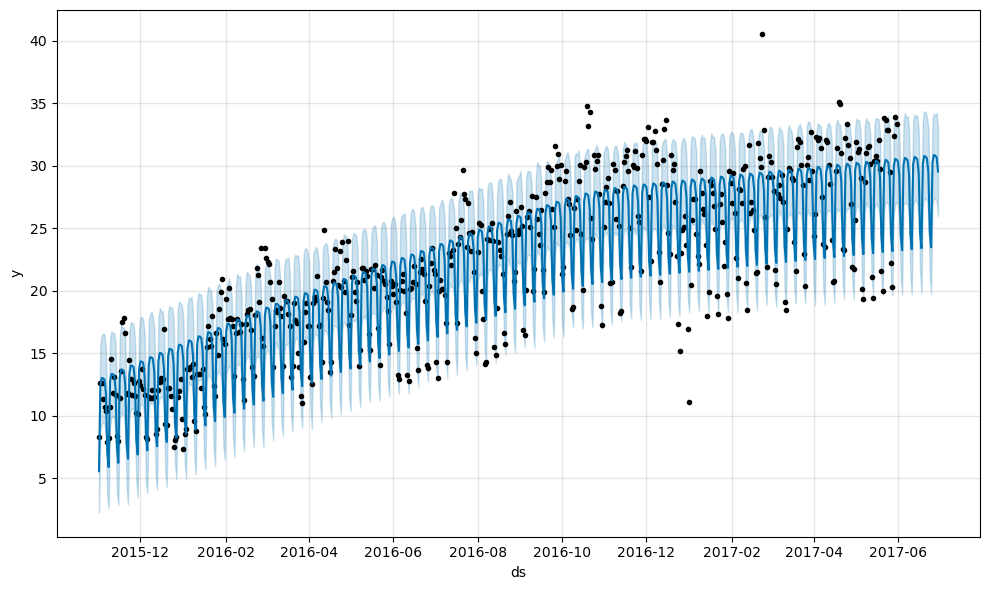

In [17]:
m.plot(forecast);

<AxesSubplot:xlabel='ds'>

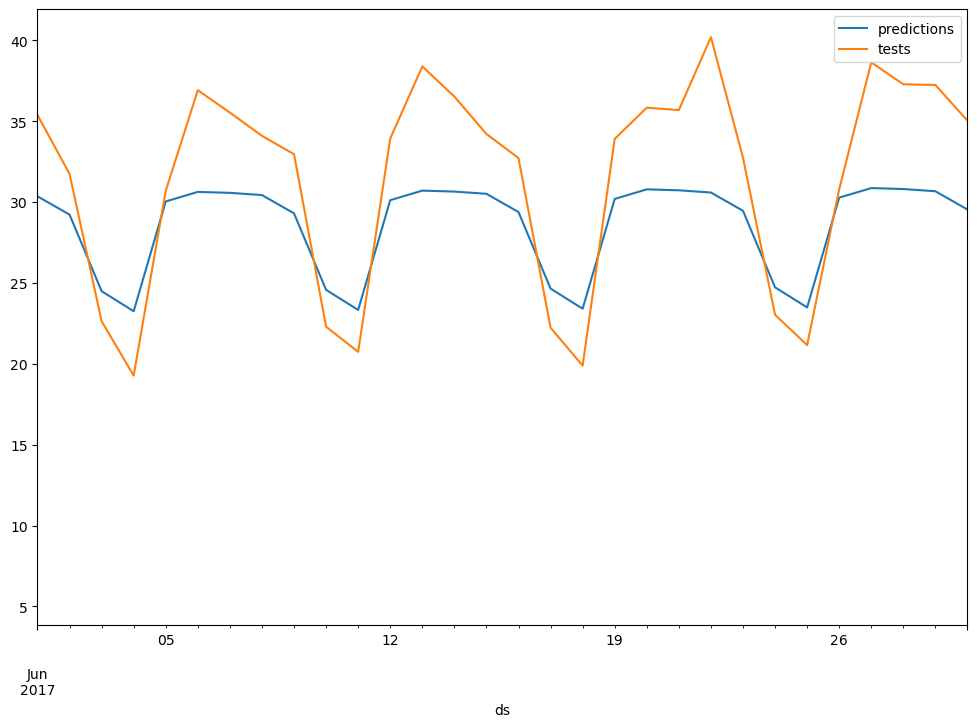

In [18]:
Start = df['ds'].iloc[-30]
End = df['ds'].iloc[-1]
ax = forecast.plot(x='ds',y='yhat',label='predictions',legend=True,figsize=(12,8))
test.plot(x='ds',y='y',legend=True,label='tests',ax=ax, xlim=(Start,End))

In [19]:
RMSE = rmse(x1=test['y'],x2=forecast['yhat'][-30:])
print(RMSE)
print(df['y'].mean())
print(df['y'].std())

4.677670531285106
22.2970177722953
7.0063388757048575


In [20]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

In [21]:
initial = '480 days'
period = '20 days'
horizon = '20 days'

In [22]:
df_cv = cross_validation(m,horizon=horizon,initial=initial,period=period);
df_cv

INFO:prophet:Making 4 forecasts with cutoffs between 2017-03-12 00:00:00 and 2017-05-11 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

C:\Users\dsd09\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\dsd09\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\dsd09\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\dsd09\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\dsd09\a

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-03-13,27.825964,24.292708,31.314074,24.947917,2017-03-12
1,2017-03-14,28.238228,24.557118,31.706334,29.854167,2017-03-12
2,2017-03-15,28.215728,24.518326,31.669894,29.687500,2017-03-12
3,2017-03-16,28.091640,24.518816,31.814774,29.041667,2017-03-12
4,2017-03-17,27.200714,23.804015,30.710799,28.854167,2017-03-12
...,...,...,...,...,...,...
75,2017-05-27,24.324448,20.755260,27.724809,22.197917,2017-05-11
76,2017-05-28,23.098356,19.425745,26.846667,20.281250,2017-05-11
77,2017-05-29,29.677816,26.106389,32.903367,32.385417,2017-05-11
78,2017-05-30,30.268274,26.959971,33.811640,33.927083,2017-05-11


In [23]:
performance_metrics(df_cv,metrics=['rmse'])

,horizon,rmse
0,2 days,2.567713
1,3 days,2.668963
2,4 days,2.613950
3,5 days,2.113704
4,6 days,1.362879
5,7 days,1.125993
6,8 days,1.915116
7,9 days,2.692569
8,10 days,3.198098
9,11 days,3.008501


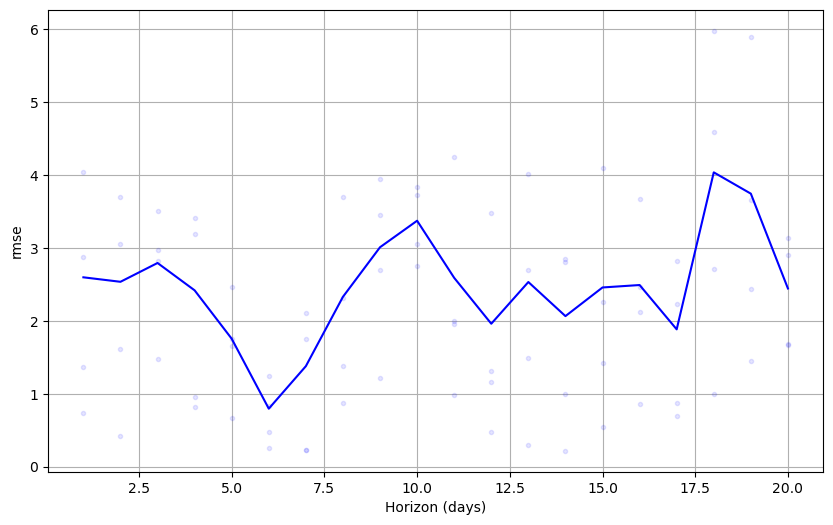

In [24]:
plot_cross_validation_metric(df_cv,metric='rmse',rolling_window=0.01);

C:\Users\dsd09\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


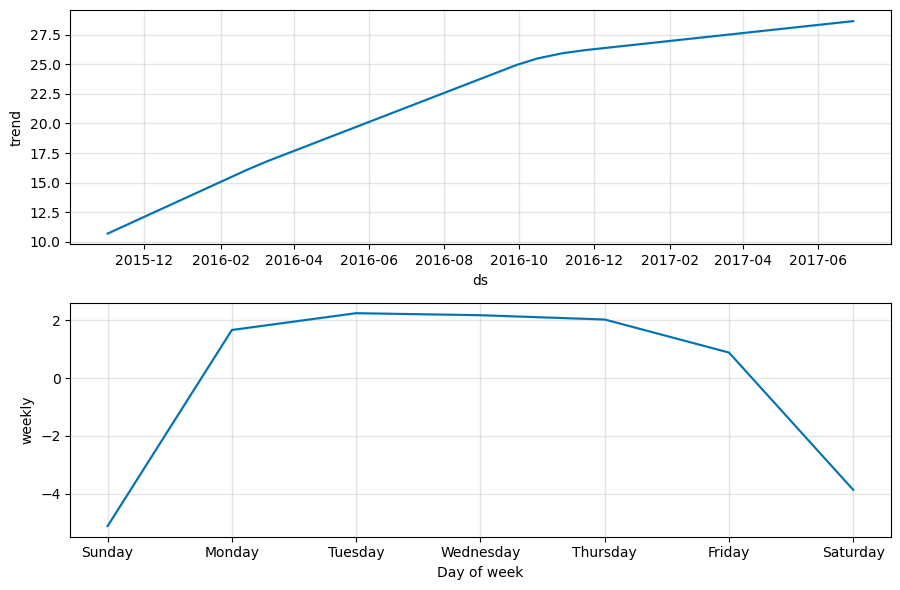

In [26]:
m.plot_components(fcst=forecast);